# Phase 5 Capstone

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [25]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading Second Dataset
df_nba2 = pd.read_csv('data/nba_stats_injuries_2013_2023.csv')

# Previewing general information on dataset
print(df_nba2.info())

#Previewing first 10 rows 
df_nba2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             5578 non-null   int64  
 1   PLAYER_NAME           5578 non-null   object 
 2   SEASON                5578 non-null   object 
 3   SEASON_NUM            5578 non-null   float64
 4   AGE                   5578 non-null   float64
 5   PLAYER_HEIGHT_INCHES  5578 non-null   object 
 6   PLAYER_WEIGHT         5578 non-null   object 
 7   GP                    5578 non-null   int64  
 8   MIN                   5578 non-null   float64
 9   USG_PCT               5578 non-null   float64
 10  PACE                  5578 non-null   float64
 11  POSS                  5578 non-null   int64  
 12  FGA_PG                5578 non-null   float64
 13  DRIVES                5578 non-null   float64
 14  DRIVE_FGA             5578 non-null   float64
 15  DRIVE_PASSES         

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,1.39,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,2.61,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,2.08,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,4.17,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN
5,1630174,Aaron Nesmith,22-23,22.5,23.0,77,215,66,24.6,0.170,...,1.67,0.80,0.4,0.0,1.1,Pacers,2022-12-23,2022-12-26,3.0,Sprained_ankle
6,1630598,Aaron Wiggins,22-23,22.5,24.0,77,190,62,18.3,0.142,...,1.96,1.32,0.5,0.0,2.1,NaN,NaN,NaN,NaN,NaN
7,1629678,Admiral Schofield,22-23,22.5,25.0,77,241,31,11.9,0.127,...,1.70,0.80,0.5,0.0,1.0,NaN,NaN,NaN,NaN,NaN
8,201143,Al Horford,22-23,22.5,36.0,81,240,58,30.8,0.116,...,1.53,0.47,1.1,0.9,2.8,NaN,NaN,NaN,NaN,NaN
9,202692,Alec Burks,22-23,22.5,31.0,78,214,51,22.0,0.218,...,3.03,2.34,0.3,0.3,0.4,NaN,NaN,NaN,NaN,NaN


In [12]:
#Previewing last 10 rows 
df_nba2.tail(10)

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
5568,201961,Wayne Ellington,13-14,13.5,26.0,76,200,45,8.7,0.150,...,2.04,1.18,0.1,0.0,0.2,NaN,NaN,NaN,NaN,NaN
5569,202325,Wesley Johnson,13-14,13.5,26.0,79,215,79,28.4,0.149,...,1.50,0.56,1.0,0.2,2.1,NaN,NaN,NaN,NaN,NaN
5570,202083,Wesley Matthews,13-14,13.5,27.0,77,220,82,33.9,0.193,...,2.04,1.18,0.7,3.3,1.6,NaN,NaN,NaN,NaN,NaN
5571,203115,Will Barton,13-14,13.5,23.0,78,175,41,9.4,0.210,...,3.22,2.60,0.2,0.1,0.8,NaN,NaN,NaN,NaN,NaN
5572,101198,Will Bynum,13-14,13.5,31.0,72,185,56,18.8,0.233,...,6.28,6.35,0.2,0.0,0.5,NaN,NaN,NaN,NaN,NaN
5573,2584,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,...,2.44,1.84,0.5,0.1,0.5,NaN,NaN,NaN,NaN,NaN
5574,201163,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,...,2.33,1.26,1.4,1.0,1.7,NaN,NaN,NaN,NaN,NaN
5575,202333,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,...,3.24,2.45,0.9,0.1,1.2,NaN,NaN,NaN,NaN,NaN
5576,2216,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,...,2.15,0.81,3.6,17.3,9.5,NaN,NaN,NaN,NaN,NaN
5577,2585,Zaza Pachulia,13-14,13.5,30.0,83,275,53,25.0,0.167,...,1.83,0.54,9.1,3.0,6.3,NaN,NaN,NaN,NaN,NaN


Looking at this initial dataset, the data obtained is from the years 2013-2023 and includes various performance and injury statistics for NBA players. There are 5578 entries and 32 columns containing the various features. 

In [16]:
# Generating statistics for dataset
df_nba2.describe()

,PLAYER_ID,SEASON_NUM,AGE,GP,MIN,USG_PCT,PACE,POSS,FGA_PG,DRIVES,...,DRIVE_PASSES,PULL_UP_FGA,TOUCHES,FRONT_CT_TOUCHES,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,DAYS MISSED
count,5.578000e+03,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,...,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,1214.000000
mean,7.789375e+05,18.241484,26.533883,48.663858,20.101040,0.182185,100.137996,2333.993905,7.190229,3.479580,...,1.258498,1.820868,34.450717,18.657153,2.692180,1.879871,1.096307,0.862370,1.972732,8.752059
std,7.189302e+05,2.829290,4.253617,24.404703,9.422618,0.056190,4.453827,1668.032665,4.808111,3.933021,...,1.581909,2.210844,20.905261,10.792302,1.294775,1.579300,1.370064,1.775437,2.168288,18.313393
min,7.080000e+02,13.500000,19.000000,1.000000,0.500000,0.000000,70.430000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.021300e+05,15.500000,23.000000,30.000000,12.700000,0.144000,97.590000,766.500000,3.500000,0.700000,...,0.200000,0.300000,18.300000,10.300000,1.660000,0.580000,0.300000,0.000000,0.500000,2.000000
50%,2.035840e+05,18.500000,26.000000,55.000000,19.800000,0.175000,99.900000,2244.500000,6.000000,2.000000,...,0.600000,0.900000,30.900000,17.200000,2.160000,1.250000,0.600000,0.100000,1.100000,4.000000
75%,1.628399e+06,20.500000,29.000000,69.000000,28.200000,0.215000,102.287500,3725.000000,10.000000,4.800000,...,1.700000,2.500000,47.100000,25.700000,3.660000,3.030000,1.400000,0.900000,2.600000,8.000000
max,1.641645e+06,22.500000,43.000000,83.000000,43.500000,0.571000,150.790000,6486.000000,24.500000,25.200000,...,12.200000,13.700000,113.300000,58.000000,7.590000,8.270000,15.200000,19.800000,13.900000,282.000000


In [ ]:
# Generating statistics for dataset
df_nba2.describe(include= "all")

In [14]:
# Find duplicates based on all columns
duplicate_rows = df_nba2[df_nba2.duplicated()]

# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [PLAYER_ID, PLAYER_NAME, SEASON, SEASON_NUM, AGE, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, GP, MIN, USG_PCT, PACE, POSS, FGA_PG, DRIVES, DRIVE_FGA, DRIVE_PASSES, DIST_MILES, AVG_SPEED, PULL_UP_FGA, PULL_UP_FG3A, TOUCHES, FRONT_CT_TOUCHES, AVG_SEC_PER_TOUCH, AVG_DRIB_PER_TOUCH, ELBOW_TOUCHES, POST_TOUCHES, PAINT_TOUCHES, TEAM, INJURED ON, RETURNED, DAYS MISSED, INJURED_TYPE]
Index: []

[0 rows x 32 columns]


In [19]:
# Find duplicates based on all columns
duplicate_rows = df_nba2[df_nba2.duplicated(subset= ['PLAYER_NAME'], keep= False)]

# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
      PLAYER_ID        PLAYER_NAME SEASON  SEASON_NUM   AGE  \
3        203932       Aaron Gordon  22-23        22.5  27.0   
4       1628988      Aaron Holiday  22-23        22.5  26.0   
5       1630174      Aaron Nesmith  22-23        22.5  23.0   
6       1630598      Aaron Wiggins  22-23        22.5  24.0   
7       1629678  Admiral Schofield  22-23        22.5  25.0   
...         ...                ...    ...         ...   ...   
5573       2584       Willie Green  13-14        13.5  32.0   
5574     201163    Wilson Chandler  13-14        13.5  27.0   
5575     202333       Xavier Henry  13-14        13.5  23.0   
5576       2216      Zach Randolph  13-14        13.5  32.0   
5577       2585      Zaza Pachulia  13-14        13.5  30.0   

     PLAYER_HEIGHT_INCHES PLAYER_WEIGHT  GP   MIN  USG_PCT  ...  \
3                      80           235  61  30.1    0.206  ...   
4                      72           185  57  13.7    0.128  ...   
5 

In [21]:
len(df_nba2['PLAYER_NAME'].unique())

1389

In [35]:
#Getting value_counts for whole dataset
for col in df_nba2:
        print (df_nba2[col].value_counts())

PLAYER_ID
202689     25
203507     24
201565     23
201933     20
203457     20
           ..
1628430     1
1626187     1
1629741     1
1629621     1
203543      1
Name: count, Length: 1391, dtype: int64
PLAYER_NAME
Kemba Walker             25
Giannis Antetokounmpo    24
Derrick Rose             23
Nerlens Noel             20
Blake Griffin            20
                         ..
Michael Frazier II        1
Marko Guduric             1
Marial Shayok             1
Kyle Alexander            1
Vitor Faverani            1
Name: count, Length: 1389, dtype: int64
SEASON
21-22    702
20-21    619
18-19    589
19-20    583
17-18    567
22-23    530
16-17    514
14-15    506
15-16    485
13-14    483
Name: count, dtype: int64
SEASON_NUM
21.5    702
20.5    619
18.5    589
19.5    583
17.5    567
22.5    530
16.5    514
14.5    506
15.5    485
13.5    483
Name: count, dtype: int64
AGE
24.0    586
23.0    543
25.0    523
26.0    452
27.0    433
22.0    422
28.0    389
29.0    347
21.0    319
30.0

In [38]:
# Dropping any duplicate rows 
df_nba2= df_nba2.drop_duplicates()

# Checking for missing values
df_nba2.isna().sum()

PLAYER_ID                  0
PLAYER_NAME                0
SEASON                     0
SEASON_NUM                 0
AGE                        0
PLAYER_HEIGHT_INCHES       0
PLAYER_WEIGHT              0
GP                         0
MIN                        0
USG_PCT                    0
PACE                       0
POSS                       0
FGA_PG                     0
DRIVES                     0
DRIVE_FGA                  0
DRIVE_PASSES               0
DIST_MILES                 0
AVG_SPEED                  0
PULL_UP_FGA                0
PULL_UP_FG3A               0
TOUCHES                    0
FRONT_CT_TOUCHES           0
AVG_SEC_PER_TOUCH          0
AVG_DRIB_PER_TOUCH         0
ELBOW_TOUCHES              0
POST_TOUCHES               0
PAINT_TOUCHES              0
TEAM                    4364
INJURED ON              4364
RETURNED                4364
DAYS MISSED             4364
INJURED_TYPE            4364
dtype: int64

In [40]:
df_nba2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             5578 non-null   int64  
 1   PLAYER_NAME           5578 non-null   object 
 2   SEASON                5578 non-null   object 
 3   SEASON_NUM            5578 non-null   float64
 4   AGE                   5578 non-null   float64
 5   PLAYER_HEIGHT_INCHES  5578 non-null   object 
 6   PLAYER_WEIGHT         5578 non-null   object 
 7   GP                    5578 non-null   int64  
 8   MIN                   5578 non-null   float64
 9   USG_PCT               5578 non-null   float64
 10  PACE                  5578 non-null   float64
 11  POSS                  5578 non-null   int64  
 12  FGA_PG                5578 non-null   float64
 13  DRIVES                5578 non-null   float64
 14  DRIVE_FGA             5578 non-null   float64
 15  DRIVE_PASSES         

After dropping duplicates, the number of entries remained at 5578 and when checking for null values, there were 4364 entries with null values. These were in the columns of Team, Injured On, Returned, Days Missed, Injured_Type. From the dataset we can see that these rows with this missing information is indicative of players who did not sustain an injury. Based on this, we can see that the distribution of player injury in this dataset would indicate 1214 entries with a confirmed injury and 4364 without an injury. 

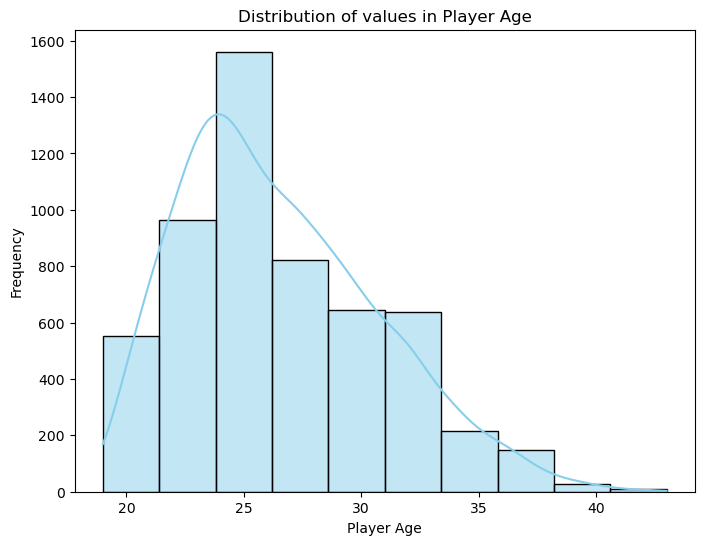

In [28]:
# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_nba2['AGE'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of values in Player Age')
plt.xlabel('Player Age')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Use boolean indexing to filter the DataFrame for the player 'Aaron Gordon'
aaron_gordon_series = df_nba2[df_nba2['PLAYER_NAME'] == "Aaron Gordon"]['PLAYER_NAME']

# Check the length of the resulting Series
length_aaron_gordon_series = len(aaron_gordon_series)
print(length_aaron_gordon_series)

10


In [41]:
# Creating separate df for injured players only
df_injured = df_nba2.dropna()
df_injured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, 3 to 5565
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             1214 non-null   int64  
 1   PLAYER_NAME           1214 non-null   object 
 2   SEASON                1214 non-null   object 
 3   SEASON_NUM            1214 non-null   float64
 4   AGE                   1214 non-null   float64
 5   PLAYER_HEIGHT_INCHES  1214 non-null   object 
 6   PLAYER_WEIGHT         1214 non-null   object 
 7   GP                    1214 non-null   int64  
 8   MIN                   1214 non-null   float64
 9   USG_PCT               1214 non-null   float64
 10  PACE                  1214 non-null   float64
 11  POSS                  1214 non-null   int64  
 12  FGA_PG                1214 non-null   float64
 13  DRIVES                1214 non-null   float64
 14  DRIVE_FGA             1214 non-null   float64
 15  DRIVE_PASSES          1214

In [44]:
# Previewing injured players dataset 
df_injured.head(10)

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
5,1630174,Aaron Nesmith,22-23,22.5,23.0,77,215,66,24.6,0.170,...,1.67,0.80,0.4,0.0,1.1,Pacers,2022-12-23,2022-12-26,3.0,Sprained_ankle
21,1629014,Anfernee Simons,22-23,22.5,23.0,75,181,62,35.0,0.247,...,4.78,4.18,0.3,0.0,0.6,Blazers,2023-02-16,2023-03-01,13.0,Sprained_ankle
30,1627732,Ben Simmons,22-23,22.5,26.0,82,240,42,26.3,0.142,...,3.42,2.35,2.3,1.1,4.0,Nets,2023-01-26,2023-02-07,12.0,Sore_knee
31,1627732,Ben Simmons,22-23,22.5,26.0,82,240,42,26.3,0.142,...,3.42,2.35,2.3,1.1,4.0,Nets,2022-10-31,2022-11-07,7.0,Knee_injury
39,202711,Bojan Bogdanovic,22-23,22.5,33.0,79,226,59,32.1,0.251,...,2.97,2.15,0.8,1.0,0.8,Pistons,2022-11-27,2022-11-29,2.0,Sore_knee
45,1627742,Brandon Ingram,22-23,22.5,25.0,80,190,36,33.2,0.306,...,4.01,3.03,2.0,1.7,0.9,Pelicans,2023-03-11,2023-03-14,3.0,Sprained_ankle
57,1628997,Caleb Martin,22-23,22.5,27.0,77,205,63,29.7,0.143,...,2.45,1.56,0.7,0.1,2.3,Heat,2023-03-11,2023-03-13,2.0,Sore_knee
58,1628997,Caleb Martin,22-23,22.5,27.0,77,205,63,29.7,0.143,...,2.45,1.56,0.7,0.1,2.3,Heat,2022-12-30,2023-01-02,3.0,Sprained_ankle
61,1629661,Cameron Johnson,22-23,22.5,27.0,80,210,34,28.0,0.203,...,2.17,1.58,0.6,0.0,1.1,Nets,2023-03-08,2023-03-10,2.0,Sore_knee


In [42]:
# Generating statistics on injured players
df_injured.describe(include = "all")

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
count,1.214000e+03,1214,1214,1214.000000,1214.000000,1214,1214,1214.000000,1214.000000,1214.000000,...,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214,1214,1214,1214.000000,1214
unique,NaN,397,10,NaN,NaN,33,124,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30,756,736,NaN,5
top,NaN,Kemba Walker,21-22,NaN,NaN,83,240,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Knicks,2022-04-10,2020-08-12,NaN,Sprained_ankle
freq,NaN,21,257,NaN,NaN,132,72,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70,9,7,NaN,588
mean,7.845084e+05,NaN,NaN,19.278418,26.687809,NaN,NaN,55.697694,25.148023,0.202437,...,2.868204,2.042636,1.419934,1.301400,2.550165,NaN,NaN,NaN,8.752059,NaN
std,7.099509e+05,NaN,NaN,2.220974,4.132859,NaN,NaN,17.097655,7.856119,0.059407,...,1.314478,1.558033,1.558144,2.207039,2.511706,NaN,NaN,NaN,18.313393,NaN
min,2.037000e+03,NaN,NaN,13.500000,19.000000,NaN,NaN,1.000000,1.000000,0.026000,...,1.130000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.023300e+05,NaN,NaN,17.500000,23.000000,NaN,NaN,46.000000,19.425000,0.160000,...,1.720000,0.700000,0.400000,0.000000,0.800000,NaN,NaN,NaN,2.000000,NaN
50%,2.038990e+05,NaN,NaN,19.500000,26.000000,NaN,NaN,60.000000,26.600000,0.192000,...,2.475000,1.560000,0.800000,0.300000,1.600000,NaN,NaN,NaN,4.000000,NaN
75%,1.628377e+06,NaN,NaN,21.500000,30.000000,NaN,NaN,68.000000,31.900000,0.245000,...,3.960000,3.240000,1.900000,1.600000,3.875000,NaN,NaN,NaN,8.000000,NaN


In [43]:
# Generating statistics on injured players
df_injured.describe()

,PLAYER_ID,SEASON_NUM,AGE,GP,MIN,USG_PCT,PACE,POSS,FGA_PG,DRIVES,...,DRIVE_PASSES,PULL_UP_FGA,TOUCHES,FRONT_CT_TOUCHES,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,DAYS MISSED
count,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,...,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,7.845084e+05,19.278418,26.687809,55.697694,25.148023,0.202437,100.240041,3062.188633,9.861944,4.996787,...,1.813591,2.750165,45.427842,24.257084,2.868204,2.042636,1.419934,1.301400,2.550165,8.752059
std,7.099509e+05,2.220974,4.132859,17.097655,7.856119,0.059407,3.106698,1396.901822,5.079406,4.671400,...,1.904943,2.690347,20.514543,10.328467,1.314478,1.558033,1.558144,2.207039,2.511706,18.313393
min,2.037000e+03,13.500000,19.000000,1.000000,1.000000,0.026000,91.030000,3.000000,0.200000,0.000000,...,0.000000,0.000000,1.500000,0.500000,1.130000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.023300e+05,17.500000,23.000000,46.000000,19.425000,0.160000,98.270000,2020.000000,5.800000,1.300000,...,0.400000,0.500000,29.600000,16.200000,1.720000,0.700000,0.400000,0.000000,0.800000,2.000000
50%,2.038990e+05,19.500000,26.000000,60.000000,26.600000,0.192000,100.240000,3165.000000,8.900000,3.500000,...,1.100000,1.900000,43.000000,24.000000,2.475000,1.560000,0.800000,0.300000,1.600000,4.000000
75%,1.628377e+06,21.500000,30.000000,68.000000,31.900000,0.245000,102.217500,4202.250000,13.975000,7.600000,...,2.800000,4.400000,60.600000,31.200000,3.960000,3.240000,1.900000,1.600000,3.875000,8.000000
max,1.631110e+06,22.500000,39.000000,81.000000,37.900000,0.375000,120.910000,6037.000000,23.000000,23.900000,...,9.700000,12.900000,97.400000,56.200000,6.340000,6.710000,8.500000,14.500000,13.900000,282.000000


Looking at injured players only, some initial statistics to note include:
- The average minutes played is ~25 minutes
- The average games played per season was ~ 55- 56 games (note this may be skewed as injury can affect this value)
- The average age was aproximiately between 26-27 years old
- The average days missed per injury was between 8-9 days